In [1]:
!pip install pytesseract

In [2]:
# import the necessary packages
from matplotlib import pyplot as plt
from pytesseract import Output
import pytesseract
import cv2

In [3]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [4]:
image = cv2.imread('./original_images/0.png')

In [5]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = pytesseract.image_to_data(rgb, output_type=Output.DICT)

In [8]:
for i in range(0, len(results["text"])):

    x = results["left"][i]
    y = results["top"][i]
    w = results["width"][i]
    h = results["height"][i]

    # extract the OCR text itself along with the confidence of the
    # text localization
    text = results["text"][i]
    conf = int(results["conf"][i])

    # filter out weak confidence text localizations
    if conf > 0:
        # display the confidence and text to our terminal
        print("Confidence: {}".format(conf))
        print("Text: {}".format(text))
        print("")
  
        # strip out non-ASCII text so we can draw the text on the image
        # using OpenCV, then draw a bounding box around the text along
        # with the text itself
        text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 0, 255), 3)
  


Confidence: 95
Text:  

Confidence: 95
Text: Driver

Confidence: 95
Text: Licence

Confidence: 74
Text: New

Confidence: 96
Text: South

Confidence: 96
Text: Wales,

Confidence: 96
Text: Australia

Confidence: 92
Text: Daenerys

Confidence: 92
Text: TARGARYEN

Confidence: 86
Text: Card

Confidence: 94
Text: Number

Confidence: 64
Text: 2020

Confidence: 96
Text: 650

Confidence: 96
Text: 136

Confidence: 95
Text: 22

Confidence: 96
Text: THE

Confidence: 96
Text: NORTH

Confidence: 95
Text: Date

Confidence: 95
Text: of

Confidence: 88
Text: Birth

Confidence: 92
Text: Expiry

Confidence: 95
Text: Date

Confidence: 95
Text: 18

Confidence: 95
Text: MAR

Confidence: 95
Text: 1970

Confidence: 85
Text: 22

Confidence: 90
Text: JUL

Confidence: 90
Text: 2015

Confidence: 95
Text:  

Confidence: 95
Text: 



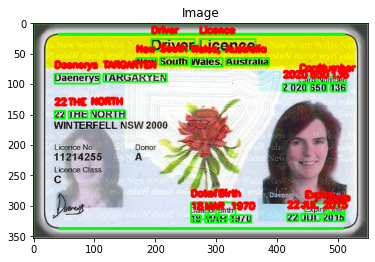

In [9]:
plt_imshow("Image", image)